In [ ]:
from xml.etree import ElementTree
import csv
import os
import re


def xml_to_csv(path_to_folder, attributes = ['id','name','platform','publishers','publicationDate',
      'globallySoldUnits','genres','criticScore','userScore',
      'developers','summary','rating','series'], list_att= ["publishers","genres","developers"] ):
        '''
        path_to_folder : is the path to the folder with the .xml files
        attributes : list of names of the attributes in the .xml files
        list_att : list of names of the attributes in attributes which are list attributes 
        '''
        path_to_folder = path_to_folder.replace("\\","/")
        paths = [path_to_folder+"/"+name for name in os.listdir(path_to_folder) if ".xml" in name]

        for f in paths:
            # PARSE XML
            #print(f)
            xml = ElementTree.parse(f)

            # CREATE CSV FILE
            with open(f.replace(".xml",".csv"), 'w', newline='',encoding="utf-8") as outfile:
                writer = csv.writer(outfile)
                #csvfile = open(f.replace(".xml",".csv"),'w',encoding='utf-8')
                #csvfile_writer = csv.writer(csvfile)

                # ADD THE HEADER TO CSV FILE
                #csvfile_writer.writerow(["id","name"])

                writer.writerow(attributes)

                # FOR EACH EMPLOYEE
                for i, videogame in enumerate(xml.findall("videogame")):
                    if(videogame):
                        csv_line = list()
                        for a in attributes:
                                locals()[a] = videogame.find(a)
                                #print("bool",a,":", None != locals()[a])
                                if (None != locals()[a]):
                                    if (a in list_att):
                                        sub_list = list()
                                        for c1 in locals()[a].findall("*"):
                                            for c2 in c1.findall("*"):
                                                sub_list.append(c2.text)
                                        csv_line.append(",".join(sub_list))
                                    else: 
                                        csv_line.append(locals()[a].text)
                                else:
                                    csv_line.append("")
                                    #print("line after append:",csv_line)
                        # ADD A NEW ROW TO CSV FILE
                        #csvfile_writer.writerow(csv_line)
                        writer.writerow(csv_line)
                        #print("final line:",csv_line)
                #csvfile.close()

In [52]:
#path to original folder
path_to_folder = r"C:\Users\leon_\Studium\Master 2022\Data Science\1. Semester\WDI Web Data Integration\Project WDI1\02 Integrated scemas".replace("\\","/")
#path to preprocessed folder
prePro_path = r"C:\Users\leon_\Studium\Master 2022\Data Science\1. Semester\WDI Web Data Integration\Project WDI1\03 Gold Standard & Preprocessing".replace("\\","/")
#xml_to_csv(path_to_folder=path_to_folder)

In [304]:
#import libraries
import csv
import pandas as pd
import numpy as np
import random
import math
#the paths to the original datasets
paths = [r"C:\Users\leon_\Studium\Master 2022\Data Science\1. Semester\WDI Web Data Integration\Project WDI1\02 Integrated scemas\integrated_target_schema_Windows.csv"
,r"C:\Users\leon_\Studium\Master 2022\Data Science\1. Semester\WDI Web Data Integration\Project WDI1\02 Integrated scemas\integrated_target_schemaPS4.csv"
,r"C:\Users\leon_\Studium\Master 2022\Data Science\1. Semester\WDI Web Data Integration\Project WDI1\02 Integrated scemas\target_schema_metacritic.csv"
,r"C:\Users\leon_\Studium\Master 2022\Data Science\1. Semester\WDI Web Data Integration\Project WDI1\02 Integrated scemas\target_schema_Video_Games_Sales.csv"
,r"C:\Users\leon_\Studium\Master 2022\Data Science\1. Semester\WDI Web Data Integration\Project WDI1\02 Integrated scemas\wikidata_integrated_target_schema.csv"]

#the paths to the matches
c_paths= [r"C:\Users\leon_\Studium\Master 2022\Data Science\1. Semester\WDI Web Data Integration\Project WDI1\03 Gold Standard & Preprocessing\A-B.csv",
r"C:\Users\leon_\Studium\Master 2022\Data Science\1. Semester\WDI Web Data Integration\Project WDI1\03 Gold Standard & Preprocessing\A-D.csv",
r"C:\Users\leon_\Studium\Master 2022\Data Science\1. Semester\WDI Web Data Integration\Project WDI1\03 Gold Standard & Preprocessing\B-C.csv",
r"C:\Users\leon_\Studium\Master 2022\Data Science\1. Semester\WDI Web Data Integration\Project WDI1\03 Gold Standard & Preprocessing\C-D.csv",
r"C:\Users\leon_\Studium\Master 2022\Data Science\1. Semester\WDI Web Data Integration\Project WDI1\03 Gold Standard & Preprocessing\C-E.csv"]

#preprocessing the pathnames
for i in range(0,len(paths)):
    paths[i] = paths[i].replace("\\","/")

for i in range(0,len(c_paths)):
    c_paths[i] = c_paths[i].replace("\\","/")

#Naming the paths
names = ["B","D","A","C","E"]
paths = dict(zip(names,paths))
compare = [["A","B"],["A","D"],["B","C"],["C","D"],["C","E"]]

In [96]:
#todo delete?
for i in range(0,len(c_paths)):
    csv_1 = pd.read_csv(paths[compare[i][0]])
    csv_2 = pd.read_csv(paths[compare[i][1]])
    compare_csv =  pd.read_csv(c_paths[i],sep=";")
    for j in range(0,len(compare_csv)):    
        temprow1 = csv_1[compare_csv.iloc[j][0] == csv_1["id"]]
        temprow2 = csv_2[compare_csv.iloc[j][1] == csv_2["id"]]
        compare_csv.iloc[j] = pd.concat([temprow1.reset_index(drop=True),temprow2.reset_index(drop=True)], axis=1, ignore_index=True)
        compare_csv.iloc[j]
    compare_csv.to_csv(c_paths[i].replace(r".csv", "_new.csv"), index=False, sep=";")

In [148]:
#look up the found matches and put their rows in a table
for i in range(0,len(c_paths)):               
    csv_1 = pd.read_csv(paths[compare[i][0]])
    csv_2 = pd.read_csv(paths[compare[i][1]])
    compare_csv =  pd.read_csv(c_paths[i],sep=";")
    merged_csv = pd.DataFrame(np.zeros((0,0)))
    for j in range(0,len(compare_csv)):
        temprow1 = csv_1[compare_csv.iloc[j][0] == csv_1["id"]]
        temprow2 = csv_2[compare_csv.iloc[j][1] == csv_2["id"]]
        merged =pd.concat([temprow1.reset_index(drop=True),temprow2.reset_index(drop=True)], axis=2)
        merged_csv = pd.concat([merged_csv,merged], axis=0)
    #save as dataset1-dataset2_new.csv
    merged_csv.to_csv(c_paths[i].replace(r".csv", "_new.csv"), index=False, sep=";")

In [147]:
j = 0
#combine a fith in samples (the j+1 th fith)
for i in range(0,len(compare)):
        num = 12
        csv_1 = pd.read_csv(paths[compare[i][0]])
        csv_2 = pd.read_csv(paths[compare[i][1]])
        sample1 = csv_1.iloc[random.sample(range(j*csv_1.shape[0]//5,(((j+1)*csv_1.shape[0]//5)-1)),num)]
        sample2 = csv_2.iloc[random.sample(range(j*csv_2.shape[0]//5,(((j+1)*csv_2.shape[0]//5)-1)),num)]
        pd.concat([sample1.reset_index(drop=True),sample2.reset_index(drop=True)],axis=1).to_csv(path_to_folder+ "/" + "-".join(compare[i]) +"_"+str(j+1)+".csv",index=False)  

In [311]:
#find all platform names in dataset
#all_platforms = [set(pd.read_csv(p)["platform"]) for p in paths.values()]
#export them
#pd.DataFrame(all_platforms).to_csv(path_to_folder+ "/" + "platforms"+".csv",index=False, sep=";")  
#import them (they were edited by hand)
platforms = pd.read_csv(r"C:\Users\leon_\Studium\Master 2022\Data Science\1. Semester\WDI Web Data Integration\Project WDI1\03 Gold Standard & Preprocessing\platforms.csv".replace("\\","/"), sep =";", header=None)
#transpose
platforms = platforms.transpose()
#select ony the ones in dataset_c (imputed for the ones in b)
platforms = platforms.loc[~platforms.isnull()[3],range(0,5)]
#drop the first row
platforms = platforms.drop(0)
#replace strings in with string lists
for j in range (0,len(platforms.columns)):
    for i in range(0,len(platforms)):
        try:
            platforms.iloc[i,j] = platforms.iloc[i,j].split(",")
        except AttributeError:
            if not math.isnan(platforms.iloc[i,j]):
                print("col:",j,"row:",i, platforms.iloc[i,j])

In [399]:
#change platform names
#for all datesets
for i in range(0,5):
    csv = pd.read_csv(paths[names[i]])
#for all platform names
    for j in range(0,len(platforms)):
    #if the platform is in this dataframe
        if type(platforms.iloc[j,i]) == list:
            #find matching platform name and replace with entrie from dataset C
            csv["platform"] = np.where(csv["platform"].isin(platforms.iloc[j,i]),platforms.iloc[j,3],csv["platform"])
    #save as .csv
    csv.to_csv(prePro_path+"/"+names[i]+"_uni_plat.csv", index=False, sep=";")

In [ ]:
#filter dataset E by platforms contained in other datasets


In [80]:
#fig, axs = plt.subplots(1, 4, sharey=False, figsize=(10,5))
#for i in range(0,5):



i=0
p = list(paths.values())[i]
csv = pd.read_csv(p)

tba = list()
for i,d in enumerate(csv["publicationDate"]):
    try:
        pd.to_datetime(d)
    except:
        print(i,d)
        tba.append(i)
csv.loc[tba,'publicationDate'] = None

#todo doesn't work
(csv[-tba, "publicationDate"] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
#dates = pd.to_datetime(csv["publicationDate"])
#dates
#(dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
#dates
# show the figure
#plt.show()    
    

699 TBA-01-01
824 TBA-01-01
1836 TBA-01-01
2561 TBA-01-01


TypeError: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'

NameError: name 'csv' is not defined

699     None
824     None
1836    None
2561    None
Name: publicationDate, dtype: object

0


,id,name,platform,publishers,publicationDate,globallySoldUnits,genres,criticScore,userScore,developers,summary,rating,series
0,Windowgames_1,101 Dalmatians: Escape from DeVil Manor,PC,Disney Interactive,1999-01-01,NaN,"Puzzle,Strategy,Adventure",NaN,NaN,DreamForge Intertainment,NaN,NaN,NaN
1,Windowgames_2,102 Dalmatians: Puppies to the Rescue,PC,Eidos Interactive,2000-01-01,NaN,"Platform,Adventure",NaN,NaN,Crystal Dynamics,NaN,NaN,NaN
2,Windowgames_3,140,PC,Abstraction Games,2016-01-01,NaN,"Music,Platform,Puzzle,Strategy,Indie",NaN,NaN,Double Fine Productions,NaN,NaN,NaN
3,Windowgames_4,1001 Spikes,PC,Nicalis,2014-01-01,NaN,"Platform,Adventure,Indie",NaN,NaN,8bits Fanatics,NaN,NaN,NaN
4,Windowgames_5,The 11th Hour,PC,Virgin Interactive,1995-01-01,NaN,"Point-and-click,Puzzle,Adventure",NaN,NaN,Trilobyte,NaN,NaN,NaN


TypeError: object of type 'AxesSubplot' has no len()

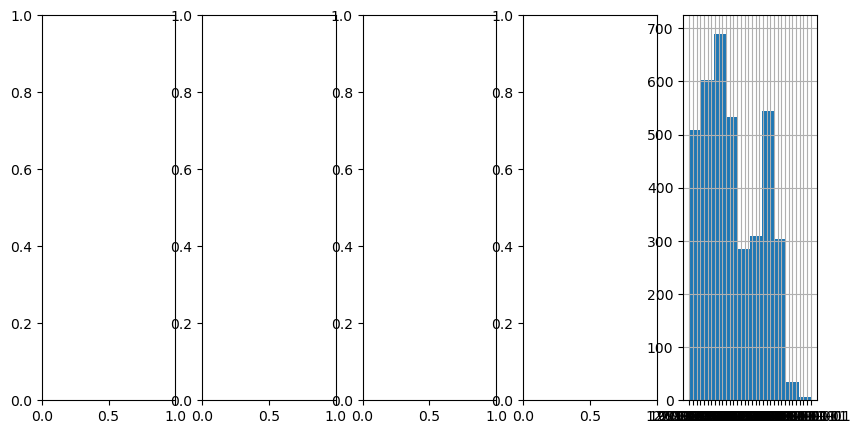

In [15]:
import matplotlib.pyplot as plt
!pip install tk
from tkinter import *

fig, axs = plt.subplots(1, 5, sharey=False, figsize=(10,5))

for i, p in enumerate(paths.values()):
    csv = pd.read_csv(p)
    print(i)

    display(csv.head())
    axs[i].hist(csv["publicationDate"])

# use this call to prevent the subplots from overlapping
plt.tight_layout()
# show the figure
plt.show()    
    

In [ ]:
from xml.etree import ElementTree
import csv
import os
import re


def xml_to_csv(path_to_folder, attributes = ['id','name','platform','publishers','publicationDate',
      'globallySoldUnits','genres','criticScore','userScore',
      'developers','summary','rating','series'], list_att= ["publishers","genres","developers"] ):
        '''
        path_to_folder : is the path to the folder with the .xml files
        attributes : list of names of the attributes in the .xml files
        list_att : list of names of the attributes in attributes which are list attributes 
        '''
        path_to_folder = path_to_folder.replace("\\","/")
        paths = [path_to_folder+"/"+name for name in os.listdir(path_to_folder) if ".xml" in name]

        for f in paths:
            # PARSE XML
            #print(f)
            xml = ElementTree.parse(f)

            # CREATE CSV FILE
            with open(f.replace(".xml",".csv"), 'w', newline='',encoding="utf-8") as outfile:
                writer = csv.writer(outfile)
                #csvfile = open(f.replace(".xml",".csv"),'w',encoding='utf-8')
                #csvfile_writer = csv.writer(csvfile)

                # ADD THE HEADER TO CSV FILE
                #csvfile_writer.writerow(["id","name"])

                writer.writerow(attributes)

                # FOR EACH EMPLOYEE
                for i, videogame in enumerate(xml.findall("videogame")):
                    if(videogame):
                        csv_line = list()
                        for a in attributes:
                                locals()[a] = videogame.find(a)
                                #print("bool",a,":", None != locals()[a])
                                if (None != locals()[a]):
                                    if (a in list_att):
                                        sub_list = list()
                                        for c1 in locals()[a].findall("*"):
                                            for c2 in c1.findall("*"):
                                                sub_list.append(c2.text)
                                        csv_line.append(",".join(sub_list))
                                    else: 
                                        csv_line.append(locals()[a].text)
                                else:
                                    csv_line.append("")
                                    #print("line after append:",csv_line)
                        # ADD A NEW ROW TO CSV FILE
                        #csvfile_writer.writerow(csv_line)
                        writer.writerow(csv_line)
                        #print("final line:",csv_line)
                #csvfile.close()  